# Tanager matched-filter demo

Multi-scene runner modeled after the PRISMA/EnMAP demos. Configure scenes in `SCENE_CONFIGS` and run them in one go.

In [1]:

from pathlib import Path
import os, sys

NOTEBOOK_ROOT = Path.cwd().resolve()
REPO_ROOT = NOTEBOOK_ROOT
while not (REPO_ROOT / 'scripts').exists() and REPO_ROOT.parent != REPO_ROOT:
    REPO_ROOT = REPO_ROOT.parent
if not (REPO_ROOT / 'scripts').exists():
    raise RuntimeError('Could not locate repository root containing scripts directory.')

os.environ.setdefault('PYTHONPATH', str(REPO_ROOT))
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

# Fixed assets
DEM_PATH = Path('/mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/DEM_1Km/srtm30plus_v11_land.nc')
LUT_PATH = Path('/mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/LUTs/CH4_lut.hdf5')
SNR_REF = REPO_ROOT / 'reference_snr' / 'tanager' / 'snr_reference_columnwise.npz'
OUTPUT_ROOT = REPO_ROOT / 'notebooks' / 'outputs' / 'pipeline_demo' / 'tanager'
SCENE_ROOT = REPO_ROOT / 'test_data' / 'tanager' / 'GHG-plumes'

# Auto-discover scenes: expect basic_radiance*.h5 and basic_sr*.h5 in each subfolder
SCENE_CONFIGS = []
for scene_dir in sorted(SCENE_ROOT.glob('*')):
    if not scene_dir.is_dir():
        continue
    rad_files = sorted(scene_dir.glob('basic_radiance_hdf5__*.h5'))
    sr_files = sorted(scene_dir.glob('basic_sr_hdf5__*.h5'))
    if not rad_files or not sr_files:
        continue
    cfg = {
        'enabled': True,
        'name': scene_dir.name,
        'rad': rad_files[0],
        'sr': sr_files[0],
        'min_wavelength': 2100.0,
        'max_wavelength': 2450.0,
        'k': 1,
        'mf_mode': 'full-column',  # Options: 'srf-column', 'full-column', 'advanced', 'jpl'
        'output_dir': OUTPUT_ROOT / scene_dir.name,
    }
    SCENE_CONFIGS.append(cfg)

# Manual fallback example (kept for reference)
# SCENE_CONFIGS.append({ ... })

print('Repo root:', REPO_ROOT)
print('DEM:', DEM_PATH)
print('LUT:', LUT_PATH)
print('SNR ref:', SNR_REF)
print('Output root:', OUTPUT_ROOT)
print('Scene root:', SCENE_ROOT)
print('Discovered scenes:', [c['name'] for c in SCENE_CONFIGS])


Repo root: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas
DEM: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/DEM_1Km/srtm30plus_v11_land.nc
LUT: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/LUTs/CH4_lut.hdf5
SNR ref: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/reference_snr/tanager/snr_reference_columnwise.npz
Output root: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks/outputs/pipeline_demo/tanager
Scene root: /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/test_data/tanager/GHG-plumes
Discovered scenes: ['20241004_081921_28_4001', '20241121_183741_33_4001', '20250219_053251_31_4001', '20250423_134021_00_4001', '20250423_134026_31_4001']


In [2]:

from scripts.pipelines import tanager_pipeline
from typing import Dict

OUTPUT_ROOT.mkdir(parents=True, exist_ok=True)

results = []
for cfg in SCENE_CONFIGS:
    if not cfg.get('enabled', True):
        continue
    rad = Path(cfg['rad'])
    sr = Path(cfg['sr'])
    outdir = Path(cfg.get('output_dir', OUTPUT_ROOT / cfg['name']))
    outdir.mkdir(parents=True, exist_ok=True)
    print(f"Running {cfg['name']} -> {outdir}")
    tanager_pipeline.ch4_detection_tanager(
        radiance_file=str(rad),
        sr_file=str(sr),
        dem_file=str(DEM_PATH),
        lut_file=str(LUT_PATH),
        output_dir=str(outdir),
        k=int(cfg.get('k', 1)),
        min_wavelength=float(cfg.get('min_wavelength', 2100.0)),
        max_wavelength=float(cfg.get('max_wavelength', 2450.0)),
        snr_reference_path=str(SNR_REF),
        mf_mode=cfg.get('mf_mode', 'srf-column'),
    )
    results.append(outdir)
print('Done')


Running 20241004_081921_28_4001 -> /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks/outputs/pipeline_demo/tanager/20241004_081921_28_4001
Mean Elevation within Bounding Box in Km: 0.21584365844726563


/home/esivla/miniconda3/envs/hygasMF/lib/python3.11/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Processing /tmp/tmpfqff22vc/temp_data.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Processing /tmp/tmpmn11nwcj/temp_data.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Processing /tmp/tmpidcfrw53/temp_data.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Processing /tmp/tmpkm2t9dyd/temp_data.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Running 20241121_183741_33_4001 -> /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks/outputs/pipeline_demo/tanager/20241121_183741_33_4001
Mean Elevation within Bounding Box in Km: 0.4393138427734375
Processing /tmp/tmpfqo9cgmj/temp_data.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Processing /tmp/tmpg9hj0jio/temp_data.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Processing /tmp/tmptvv6c33e/temp_data.vrt [1/1] : 0...10...20...30...40...50...60.

In [3]:

from pathlib import Path
for outdir in results:
    print(f"Outputs in {outdir}:")
    for f in sorted(Path(outdir).glob('*')):
        print(' ', f.name)


Outputs in /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks/outputs/pipeline_demo/tanager/20241004_081921_28_4001:
  basic_radiance_hdf5__20241004_081921_28_4001_basic_radiance_hdf5_CL.tif
  basic_radiance_hdf5__20241004_081921_28_4001_basic_radiance_hdf5_MF.tif
  basic_radiance_hdf5__20241004_081921_28_4001_basic_radiance_hdf5_MF_uncertainty.tif
  basic_radiance_hdf5__20241004_081921_28_4001_basic_radiance_hdf5_RGB.tif
Outputs in /mnt/d/Lavoro/Assegno_Ricerca_Sapienza/CLEAR_UP/CH4_detection/Matched_filter_approach/hygas/notebooks/outputs/pipeline_demo/tanager/20241121_183741_33_4001:
  basic_radiance_hdf5__20241121_183741_33_4001_basic_radiance_hdf5_CL.tif
  basic_radiance_hdf5__20241121_183741_33_4001_basic_radiance_hdf5_MF.tif
  basic_radiance_hdf5__20241121_183741_33_4001_basic_radiance_hdf5_MF_uncertainty.tif
  basic_radiance_hdf5__20241121_183741_33_4001_basic_radiance_hdf5_RGB.tif
Outputs in /mnt/d/Lavoro/Assegno_Ricerca_Sapie

Plotting 20250423_134026_31_4001: basic_radiance_hdf5__20250423_134026_31_4001_basic_radiance_hdf5_MF.tif basic_radiance_hdf5__20250423_134026_31_4001_basic_radiance_hdf5_MF_uncertainty.tif


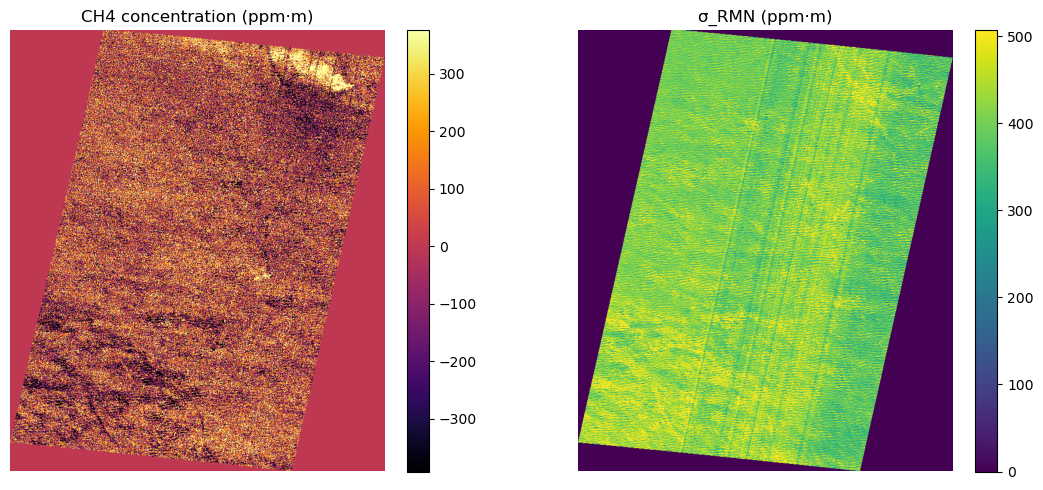

In [4]:

import rasterio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Plot concentration and uncertainty for the last run scene
autofiles = []
for outdir in results:
    outdir = Path(outdir)
    conc = next(outdir.glob('*_MF.tif'), None)
    unc = next(outdir.glob('*_MF_uncertainty.tif'), None)
    if conc and unc:
        autofiles.append((outdir.name, conc, unc))

if not autofiles:
    print('No output GeoTIFFs found to plot.')
else:
    name, conc_path, unc_path = autofiles[-1]
    print(f'Plotting {name}:', conc_path.name, unc_path.name)
    with rasterio.open(conc_path) as src:
        conc_img = src.read(1)
    with rasterio.open(unc_path) as src:
        unc_img = src.read(1)

    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    im0 = axes[0].imshow(conc_img, cmap='inferno', vmin=np.nanpercentile(conc_img,5), vmax=np.nanpercentile(conc_img,95))
    axes[0].set_title('CH4 concentration (ppm·m)')
    plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
    im1 = axes[1].imshow(unc_img, cmap='viridis', vmin=np.nanpercentile(unc_img,5), vmax=np.nanpercentile(unc_img,95))
    axes[1].set_title('σ_RMN (ppm·m)')
    plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
    for ax in axes:
        ax.axis('off')
    plt.tight_layout(); plt.show()
